In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("data.csv")

In [ ]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [ ]:
for i in range(len(data.columns)):
    print(data[data.columns[i]].unique)

<bound method Series.unique of 0      0.98
1      0.98
2      0.98
3      0.98
4      0.90
       ... 
763    0.64
764    0.62
765    0.62
766    0.62
767    0.62
Name: X1, Length: 768, dtype: float64>
<bound method Series.unique of 0      514.5
1      514.5
2      514.5
3      514.5
4      563.5
       ...  
763    784.0
764    808.5
765    808.5
766    808.5
767    808.5
Name: X2, Length: 768, dtype: float64>
<bound method Series.unique of 0      294.0
1      294.0
2      294.0
3      294.0
4      318.5
       ...  
763    343.0
764    367.5
765    367.5
766    367.5
767    367.5
Name: X3, Length: 768, dtype: float64>
<bound method Series.unique of 0      110.25
1      110.25
2      110.25
3      110.25
4      122.50
        ...  
763    220.50
764    220.50
765    220.50
766    220.50
767    220.50
Name: X4, Length: 768, dtype: float64>
<bound method Series.unique of 0      7.0
1      7.0
2      7.0
3      7.0
4      7.0
      ... 
763    3.5
764    3.5
765    3.5
766    3.5
767    

### Manuel Feature Selection

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

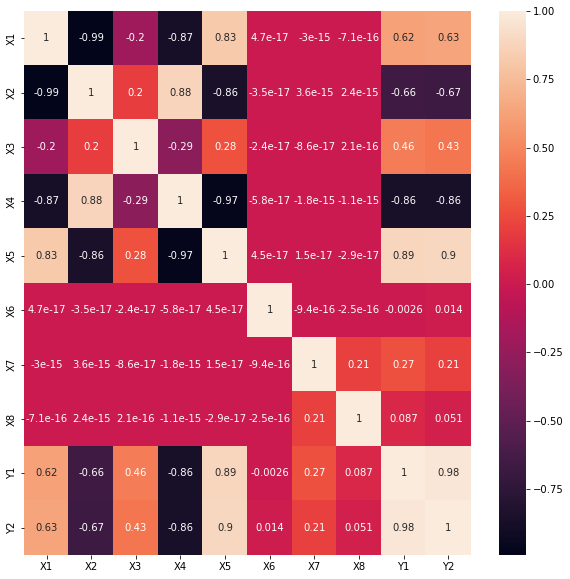

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
cor_target = abs(data.corr()["Y1"])
relevant_features = cor_target[cor_target>0.3]
relevant_features

X1    0.622272
X2    0.658120
X3    0.455671
X4    0.861828
X5    0.889431
Y1    1.000000
Y2    0.975862
Name: Y1, dtype: float64

### Test/Train Split

In [ ]:
y=data["Y1"]

In [ ]:
X=data.drop(["Y1","Y2"],axis=1)

In [ ]:
y

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Y1, Length: 768, dtype: float64

In [ ]:
X

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=41)

### SequentialFeatureSelector

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [ ]:
model_sfs=SFS(RandomForestRegressor(n_estimators=10,random_state=10,verbose=2),
            direction='forward',
            scoring='r2',
            cv=5
             )

In [ ]:
sfs=model_sfs.fit(X_train,y_train)

In [ ]:
sfs.get_support()

array([ True, False,  True,  True, False, False,  True, False])

In [ ]:
sfs.n_features_to_select_

4

#### FORWARD

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
sfs_m =SFS(RandomForestRegressor(n_estimators=10,random_state=10),
            k_features=8,
            forward=True,
            floating=False,
            verbose=2,
            scoring='r2',
            cv=5
             )

In [ ]:
sfs_m = sfs_m.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s finished

[2022-02-14 17:42:07] Features: 1/8 -- score: 0.9060253250870659[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s finished

[2022-02-14 17:42:07] Features: 2/8 -- score: 0.9971872038735731[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.4s finished

[2022-02-14 17:42:07] Features: 3/8 -- score: 0.9971922703443079[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

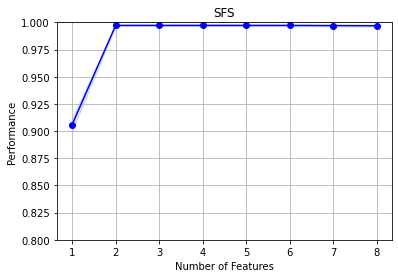

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1=plot_sfs(sfs_m.get_metric_dict(),kind='std_dev')
plt.ylim([0.8,1])
plt.title("SFS")
plt.grid()
plt.show()

In [ ]:
sfs_m.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.91394108, 0.90918803, 0.90458875, 0.90649625, 0.89591252]),
  'avg_score': 0.9060253250870659,
  'feature_names': ('X1',)},
 2: {'feature_idx': (0, 6),
  'cv_scores': array([0.99730941, 0.99784132, 0.99783452, 0.99663962, 0.99631114]),
  'avg_score': 0.9971872038735731,
  'feature_names': ('X1', 'X7')},
 3: {'feature_idx': (0, 3, 6),
  'cv_scores': array([0.99730941, 0.99786665, 0.99783452, 0.99663962, 0.99631114]),
  'avg_score': 0.9971922703443079,
  'feature_names': ('X1', 'X4', 'X7')},
 4: {'feature_idx': (0, 2, 3, 6),
  'cv_scores': array([0.99730964, 0.99785165, 0.99785185, 0.99663962, 0.99631114]),
  'avg_score': 0.9971927813842939,
  'feature_names': ('X1', 'X3', 'X4', 'X7')},
 5: {'feature_idx': (0, 1, 2, 3, 6),
  'cv_scores': array([0.99730964, 0.99786935, 0.99784629, 0.99661968, 0.99631114]),
  'avg_score': 0.9971912207449053,
  'feature_names': ('X1', 'X2', 'X3', 'X4', 'X7')},
 6: {'feature_idx': (0, 1, 2, 3, 4, 6),
  'cv_sc

In [ ]:
selected_feat=list(sfs_m.subsets_[4]["feature_names"])
selected_feat

['X1', 'X3', 'X4', 'X7']

In [ ]:
from sklearn.metrics import roc_auc_score,r2_score

In [ ]:
rf=RandomForestRegressor(n_estimators=100,random_state=40,max_depth=4)
rf.fit(X_train[selected_feat],y_train)

RandomForestRegressor(max_depth=4, random_state=40)

In [ ]:
print('Train Set')
pred = rf.predict(X_train[selected_feat])
print("Random Forest Roc_auc= {}".format(r2_score(y_train,pred)))

print('Test Set')
pred = rf.predict(X_test[selected_feat])
print("Random Forest Roc_auc= {}".format(r2_score(y_test,pred)))

Train Set
Random Forest Roc_auc= 0.9812045478732558
Test Set
Random Forest Roc_auc= 0.9843604863285658


In [ ]:
rf_all=RandomForestRegressor(n_estimators=100,random_state=40,max_depth=4)
rf_all.fit(X_train,y_train)

print('Train Set')
pred = rf_all.predict(X_train)
print("Random Forest Roc_auc= {}".format(r2_score(y_train,pred)))

print('Test Set')
pred = rf_all.predict(X_test)
print("Random Forest Roc_auc= {}".format(r2_score(y_test,pred)))

Train Set
Random Forest Roc_auc= 0.9811933882202599
Test Set
Random Forest Roc_auc= 0.9843311964475507


#### BACKWARD

In [ ]:
back_sfs =SFS(RandomForestRegressor(n_estimators=10,random_state=10),
            k_features=5,
            forward=False,
            floating=False,
            verbose=2,
            scoring='r2',
            cv=5
             )

In [ ]:
back_sfs = back_sfs.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s finished

[2022-02-14 17:48:55] Features: 7/5 -- score: 0.9970248848041734[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s finished

[2022-02-14 17:48:56] Features: 6/5 -- score: 0.9971753554031375[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished

[2022-02-14 17:48:56] Features: 5/5 -- score: 0.9971912207449053

In [ ]:
back_sfs.subsets_

{8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7),
  'cv_scores': array([0.99713193, 0.99736564, 0.99800626, 0.99631245, 0.9957409 ]),
  'avg_score': 0.9969114380647962,
  'feature_names': ('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8')},
 7: {'feature_idx': (0, 1, 2, 3, 4, 6, 7),
  'cv_scores': array([0.99729129, 0.99783618, 0.99791276, 0.99626583, 0.99581836]),
  'avg_score': 0.9970248848041734,
  'feature_names': ('X1', 'X2', 'X3', 'X4', 'X5', 'X7', 'X8')},
 6: {'feature_idx': (0, 1, 2, 3, 4, 6),
  'cv_scores': array([0.99730941, 0.99781054, 0.99783746, 0.99661968, 0.99629969]),
  'avg_score': 0.9971753554031375,
  'feature_names': ('X1', 'X2', 'X3', 'X4', 'X5', 'X7')},
 5: {'feature_idx': (0, 1, 2, 3, 6),
  'cv_scores': array([0.99730964, 0.99786935, 0.99784629, 0.99661968, 0.99631114]),
  'avg_score': 0.9971912207449053,
  'feature_names': ('X1', 'X2', 'X3', 'X4', 'X7')}}

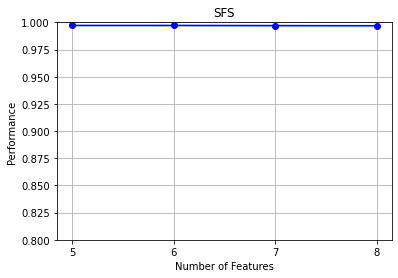

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1=plot_sfs(back_sfs.get_metric_dict(),kind='std_dev')
plt.ylim([0.8,1])
plt.title("SFS")
plt.grid()
plt.show()

In [ ]:
back_selected_feat=list(back_sfs.subsets_[5]["feature_names"])
back_selected_feat

['X1', 'X2', 'X3', 'X4', 'X7']

### ExhaustivFeatureSelection

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [ ]:
efs =EFS(RandomForestRegressor(n_estimators=10,random_state=10,max_depth=2),
            min_features=1,
            max_features=5,
            scoring='r2',
            print_progress=True,
            cv=3
             )

In [ ]:
efs = efs.fit(X_train,y_train)

Features: 218/218

In [ ]:
selected_feat= X_train.columns[list(efs.best_idx_)]

In [ ]:
selected_feat

Index(['X1', 'X7'], dtype='object')

In [ ]:
X_train[selected_feat]

,X1,X7
755,0.69,0.40
385,0.98,0.25
558,0.71,0.40
428,0.62,0.25
657,0.69,0.40
...,...,...
407,0.76,0.25
601,0.74,0.40
243,0.98,0.10
321,0.69,0.25


In [ ]:
efs_t=RandomForestRegressor(n_estimators=200,random_state=41,max_depth=4)
efs_t.fit(X_train[selected_feat],y_train)

print('Train Set')
pred = efs_t.predict(X_train[selected_feat])
print("Random Forest Roc_auc= {}".format(r2_score(y_train,pred)))

print('Test Set')
pred = efs_t.predict(X_test[selected_feat])
print("Random Forest Roc_auc= {}".format(r2_score(y_test,pred)))

Train Set
Random Forest Roc_auc= 0.9812670902340821
Test Set
Random Forest Roc_auc= 0.9849694120396858


In [ ]:
efs_t=RandomForestRegressor(n_estimators=200,random_state=41,max_depth=4)
efs_t.fit(X_train,y_train)

print('Train Set')
pred = efs_t.predict(X_train)
print("Random Forest Roc_auc= {}".format(r2_score(y_train,pred)))

print('Test Set')
pred = efs_t.predict(X_test)
print("Random Forest Roc_auc= {}".format(r2_score(y_test,pred)))

Train Set
Random Forest Roc_auc= 0.9812727656336772
Test Set
Random Forest Roc_auc= 0.9849672989602771
